# Exploring billboard data

At a minimum, you must:

Use Pandas to read in your data

Rename column names where appropriate

Describe your data: check the value counts and descriptive statistics

Make use of groupby statements

Utilize Boolean sorting

Assess the validity of your data (missing data, distributions?)


At a maximum, you should strive to:

Produce a blog-post ready description of your lab

State your assumptions about the data

Describe limitations

Consider how you can action this from a stakeholder perspective (radio, record label, fan) (We haven't covered
stakeholder analysis yet)

Include visualization

In [3]:
import pandas as pd

df = pd.read_csv('assets/billboard.csv')
# Let's take a look at our data
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Right off the bat, I am concerned about the column names. The '.' character will potentially be problematic when trying to call column names. Let's replace the '.' with a '_' character instead.

In [4]:
df.columns  =[col.replace('.','_') for col in df.columns]
df.head()

,year,artist_inverted,track,time,genre,date_entered,date_peaked,x1st_week,x2nd_week,x3rd_week,...,x67th_week,x68th_week,x69th_week,x70th_week,x71st_week,x72nd_week,x73rd_week,x74th_week,x75th_week,x76th_week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Much better!

Now let's start looking at the data itself. We can already see there are going to be a considerable amount of NaN in this data set, but that may be okay. I'm not sure if there is a better way to represent a song no longer being on the billboard chart than having an empty cell there. Let's take a closer look and find out.

In [5]:
df.describe()

,year,x1st_week,x2nd_week,x3rd_week,x4th_week,x5th_week,x6th_week,x7th_week,x8th_week,x9th_week,...,x67th_week,x68th_week,x69th_week,x70th_week,x71st_week,x72nd_week,x73rd_week,x74th_week,x75th_week,x76th_week
count,317.0,317.000000,312.000000,307.000000,300.000000,292.000000,280.000000,269.000000,260.000000,253.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2000.0,79.958991,71.173077,65.045603,59.763333,56.339041,52.360714,49.219331,47.119231,46.343874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,14.686865,18.200443,20.752302,22.324619,23.780022,24.473273,25.654279,26.370782,27.136419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2000.0,15.000000,8.000000,6.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2000.0,74.000000,63.000000,53.000000,44.750000,38.750000,33.750000,30.000000,27.000000,26.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2000.0,81.000000,73.000000,66.000000,61.000000,57.000000,51.500000,47.000000,45.500000,42.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2000.0,91.000000,84.000000,79.000000,76.000000,73.250000,72.250000,67.000000,67.000000,67.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2000.0,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000,99.000000,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Well that is interesting... the last 10 columns don't appear to have any data points at all?! How many of these empty columsn are there? Let's look a little closer.

Let's try to select all columns were there is not a single data point.

In [6]:
df.count().sort_values(ascending=True).head(15)

x76th_week    0
x66th_week    0
x67th_week    0
x68th_week    0
x69th_week    0
x75th_week    0
x71st_week    0
x72nd_week    0
x73rd_week    0
x74th_week    0
x70th_week    0
x65th_week    1
x54th_week    2
x56th_week    2
x57th_week    2
dtype: int64

This is beginning to make sense. The dataset has the weeks a song was on the billboard chart for, no songs made it  past week 70. It may make sense for us to just remove these columns from the dataset, but they aren't causing any harm at the moment.

I see one song that made it to week 65. I wonder what song that was, and what it's run on the charts looked like. Let's find out!

In [7]:
# Let's start by creating a new column that will help encapsolate some interesting information for us. We can call
# it weeks_on_chart.

# First we can grab a data frame of just the weeks to make things a little easier to work with.
# We also want to keep the track just for vizualization sake.

df_weeks = df[list(filter(lambda x: x.startswith('x'), df.columns))].transpose()

# We can now transpose the dataframe and count. The index should still match our original dataframe, so we can
# tack it on with a new name.
df['weeks_on_chart'] = [int(c) for c in df_weeks.count()] # I also need to convert the counts to ints

#Let's sort our dataframe and look at what the longest running song was
top_5 = df.sort_values('weeks_on_chart', ascending=False).head()
top_5.head()

,year,artist_inverted,track,time,genre,date_entered,date_peaked,x1st_week,x2nd_week,x3rd_week,...,x68th_week,x69th_week,x70th_week,x71st_week,x72nd_week,x73rd_week,x74th_week,x75th_week,x76th_week,weeks_on_chart
46,2000,Creed,Higher,5:16,Rock,1999-09-11,2000-07-22,81,77.0,73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57
9,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,81,54.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55
24,2000,3 Doors Down,Kryptonite,3:53,Rock,2000-04-08,2000-11-11,81,70.0,68.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53
17,2000,"Hill, Faith",Breathe,4:04,Rap,1999-11-06,2000-04-22,81,68.0,62.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53
13,2000,Creed,With Arms Wide Open,3:52,Rock,2000-05-13,2000-11-11,84,78.0,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

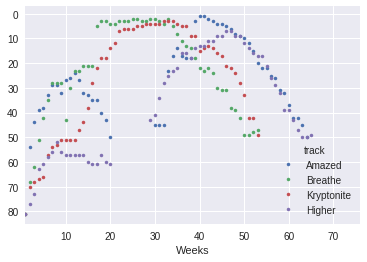

In [9]:
#df_weeks.index = ['Week ' + str(s) for s in (range(1, len(df_weeks) + 1))]
df_weeks.index = range(1, len(df_weeks) + 1)
df_weeks.index.name = 'Weeks'
df_weeks.columns = df['track']
df_weeks[df[df.weeks_on_chart >50].track].plot(style='.')
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
plt.show()

In [105]:
import datetime as datetime
df_time.head()

track,Independent Women Part I,"Maria, Maria",I Knew I Loved You,Music,Come On Over Baby (All I Want Is You),Doesn't Really Matter,Say My Name,Be With You,Incomplete,Amazed,...,Get Up,Spanish Guitar,I Know,Imagine That,Souljas,Cherchez LaGhost,Freakin' It,Kernkraft 400,Got Beef,Toca's Miracle
1999-06-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,...,NaN,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN
1999-06-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,...,NaN,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN
1999-06-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0,...,NaN,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN
1999-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,...,NaN,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN
1999-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,...,NaN,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN


In [106]:
start_dates = pd.to_datetime(df['date_entered'])
(first_date, last_date) = (min(start_dates), max(start_dates) + datetime.timedelta(weeks=len(df_weeks)))
date_list = [first_date + datetime.timedelta(weeks=x) for x in range(0, len(df_weeks))]

df_t = df.transpose()
df_time = pd.DataFrame(columns = df.track, index = date_list)
df_time.index.name = 'Date'
for t in df_t:
    temp = []
    i = 1
    
    for d in date_list:
        if d < pd.to_datetime(df_t[t].date_entered):
            temp.append(None)
        elif i < len(df_weeks):
            temp.append(df_weeks[df_t[t].track].iloc[i])
            i+=1
        else:
            temp.append(None)
    df_time[df_t[t].track] = temp


In [234]:
df_time.describe()
start = datetime.datetime(1999, 10, 1, 1, 1, 1)
end = datetime.datetime(2000, 2, 1, 1, 1, 1)
(df_time.index > start) & (df_time.index < end)
songs = df_time.count().sort_values(ascending=False).head(5).index
del df_time['Where I Wanna Be']
songs = df_time[(df_time.index > start) & (df_time.index < end)].count().sort_values(ascending=False).head(3).index

KeyError: 'Where I Wanna Be'

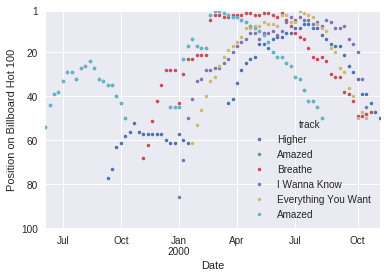

In [202]:
df_time[list(songs) + ['Amazed']].plot(style='.')
ax = plt.gca()
plt.ylim(1,100)

ax.set_ylim(ax.get_ylim()[::-1])
ax.set_yticks([1,20,40,60,80,100])
plt.ylabel("Position on Billboard Hot 100")

plt.show()

In [ ]:
position = df['date_entered']

In [83]:
df.transpose().head()

,0,1,2,3,4,5,6,7,8,9,...,307,308,309,310,311,312,313,314,315,316
year,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
artist_inverted,Destiny's Child,Santana,Savage Garden,Madonna,"Aguilera, Christina",Janet,Destiny's Child,"Iglesias, Enrique",Sisqo,Lonestar,...,"Larrieux, Amel","Braxton, Toni",Tuesday,LL Cool J,Master P,Ghostface Killah,"Smith, Will",Zombie Nation,"Eastsidaz, The",Fragma
track,Independent Women Part I,"Maria, Maria",I Knew I Loved You,Music,Come On Over Baby (All I Want Is You),Doesn't Really Matter,Say My Name,Be With You,Incomplete,Amazed,...,Get Up,Spanish Guitar,I Know,Imagine That,Souljas,Cherchez LaGhost,Freakin' It,Kernkraft 400,Got Beef,Toca's Miracle
time,3:38,4:18,4:07,3:45,3:38,4:17,4:31,3:36,3:52,4:25,...,4:02,4:24,4:06,4:00,3:33,3:04,3:58,3:30,3:58,3:22
genre,Rock,Rock,Rock,Rock,Rock,Rock,Rock,Latin,Rock,Country,...,R&B,Rock,Rock,Rap,Rap,R&B,Rap,Rock,Rap,R&B
